In [1]:
import numpy as np
import os    
import pickle 
import matplotlib.pyplot as plt

In [5]:
def loadData(path):
    L_files = os.listdir(path='cifar-10-batches-py/') #stores the list of entries from the cifar-10 folder
    train = []   #creating train list to store training data
    train_labels = [] #creating train labels for storing names
        
    print("The files ",L_files[1:6],"are being trained ")  #How many training datas are clooected will be showed
    
    for file in L_files[1:6]: 
        with open(path+file,'rb') as fldr: # with statement opens and closes file data automaticly,rb=read binary
            dict = pickle.load(fldr,encoding='bytes') 
            train.append(dict[b'data'])
            train_labels.append(dict[b'labels'])

    Dict_data = {} #creating dictionery for storing train data and train label
    Dict_data['train_data'] = np.reshape(np.array(train),newshape=(np.array(train).shape[0]*np.array(train).shape[1],np.array(train).shape[2]))
    Dict_data['train_labels'] = np.reshape(np.array(train_labels),newshape=(np.array(train_labels).shape[0]*np.array(train_labels).shape[1])) 
    return Dict_data  #The data of dictionary will be returned

In [6]:
Dataset = loadData(path='cifar-10-batches-py/')   #loading cifar-10 dataset

The files  ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5'] are being trained 


In [7]:
Dataset['train_data'].shape[0]  #The number of images 

50000

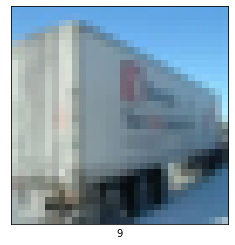

In [8]:
temp = Dataset['train_data'][15]  #Data of image 15
label = Dataset['train_labels'][15] #label of image 15


R = temp[0:1024].reshape(32,32) #The image is converted into an 32*32 bot matrix,0 to 1024 is red
G = np.reshape(temp[1024:2048],newshape=(32,32))#1024 to 1048 is blue
B = np.reshape(temp[2048:],newshape=(32,32)) #From 2048 to rest is green
temp = np.dstack((R,G,B))  #Based upon the depth R,G,B will be joined ,d stands for depth
plt.imshow(temp)#tempis inparimeter in imshow
plt.xticks([])#no tick in x
plt.yticks([])#no tickin y
plt.xlabel(label) #abel of the image will be shown in x axis
plt.show()#for showing the image

In [10]:
X_train, Y_train= Dataset['train_data'],Dataset['train_labels'] #For training of train data and train labels

In [11]:

class kNearestNeighbour(object): 
    def __init__(self):
        pass
    
    def train(self,X,Y): 
        self.Xtr = X #remembers training data
        self.Ytr = Y #remembers training labels
        
    def predict(self,X,k):
       
        Testing_samples = X.shape[0]
        
        Ypred = np.zeros(Testing_samples,dtype=self.Ytr.dtype)
        
        for i in range(Testing_samples):
            print("Testing sample = ",i,end="\r") #Samples are tested serially
            
            label_count = np.zeros(10,dtype=self.Ytr.dtype)   #label_count's sise is the number of categories 
            dist = np.sum(np.abs(X[i,:] - self.Xtr),axis=1)  #Comparing pixels
           
            idx = np.argpartition(dist,k)
            min_ind = idx[:k] # Finding the minimum index
            
            for x in min_ind:
                label_count[int(self.Ytr[x])] +=1
            Ypred[i] = np.argmax(label_count)  #Maximum value at any index is returned using np.argmax() 
    
        return Ypred 
    

In [ ]:
Num_fold = 5  # Number of folds=5
Num_train = 50000

k_choices = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] #The bigger size k_choices will be,the more accurate answer will come

if Num_train/Num_fold % Num_fold != 0.0:
    raise ValueError('Number of training samples are not evenly divisible by the number of folds.') #Samples can't be equally distributed in folds
    

X_train_folds = np.split(X_train, Num_fold) #datas are folded
y_train_folds = np.split(Y_train, Num_fold) #labels are folded


k_to_accuracies = {} # Accuracy values that are found when using that value of k.


for k in k_choices:
    k_to_accuracies[k] = []
    
for idx in range(Num_fold):
    print("fold",idx,end="\n")  #To know the current number of fold
    
    X_train_set = np.concatenate((*X_train_folds[:idx], *X_train_folds[idx+1:]), axis=0) #concatenates other folds exept the validation fold
    y_train_set = np.concatenate((*y_train_folds[:idx], *y_train_folds[idx+1:]), axis=0)
    X_validation_set = X_train_folds[idx] #The fold that is being validated
    y_validation_set = y_train_folds[idx]   
    num_validation_set = X_validation_set.shape[0]

   
    knn = kNearestNeighbour()
    knn.train(X_train_set, y_train_set) #Knearestneighbour is being trained
 
    
    for k in k_choices:
        print("k",k,end="\n")  #To know the current number of K
        
        y_validation_pred = knn.predict(X_validation_set,k)  # Predicts the labels for validation set
       
        accuracy = np.mean(y_validation_pred==y_validation_set)  # Comparing validation prediction with validation set

        k_to_accuracies[k].append(accuracy) 
        

fold 0
k 1
k 2ting sample =  9999
k 3ting sample =  9999
k 4ting sample =  9999
k 5ting sample =  9999


In [ ]:
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))  # The accuracies are being printed
    

In [ ]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    print('k = %d, average accuracy = %f' % (k, np.average(accuracies)))  # The average is printed
    plt.scatter([k] * len(accuracies), accuracies) 
    

Accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())]) #Mean of accuracies calculated 
Accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())]) #Standard Deviation is calculated
plt.errorbar(k_choices, Accuracies_mean, yerr=Accuracies_std)  #Errorbars are plotted
plt.title('cross validation on k')
plt.xlabel('k')
plt.ylabel('cross validation accuracy')
plt.show()#The graph is shown